In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint

ms = load_from_json(deepcopy(math_spec_json))

state_base = {'Qi Supply': None,
 'Quai Supply': None,
 'Block Number': None,
 'Block Difficulty': 6000,
 "Number of Regions":2,
"Zones per Region":2,
 'Historical Converted Qi': None,
 'Historical Converted Quai': None,
 'Historical Mined Ratio': None,
 'Historical Qi Hash': None,
 'Historical Quai Hash': None,
 'K Qi': 1,
 'K Quai': 1,
 'Quai Price': 1,
 'Qi Price': 1,
 'Simulation History Log': None,
 'Dummy': None}
params_base = {'Minimum Quai Conversion Amount': None,
 'Minimum Qi Conversion Amount': None,
 'Asset Return Parameterization': None,
 'PID Parameterization': None,
 'Initial Block Difficulty': None,
 "FP Controller Update Policy": 'Linear Controller Policy',
 "Block Difficulty Multiples": {"Prime": 1,
                                         "Region": .5,
                                         "Zone": .25},
'Target Mining Time': 2,
"Quai Reward Base Parameter": 2}
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[], parameter_preperation_functions=[])

Placeholder has no control action options
Controller Update Control Action has no control action options
Conversions Boundary Action has no boundary action options
Price Movements Boundary Action has no boundary action options
No python implementation for Conversions Policy / Block Reward Ratio Conversion Policy. To fix this, go to Implementations/Python/Policies and add Block Reward Ratio Conversion Policy
Price Movements Policy has no policy options
No python implementation for Controller Update Policy / Linear Controller Policy. To fix this, go to Implementations/Python/Policies and add Linear Controller Policy
No python implementation for Increment Block Number Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Increment Block Number Mechanism
No python implementation for Update Historical Mined Ratio Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Mined Ratio Mechanism
No python implementation for Update Historical Qi 

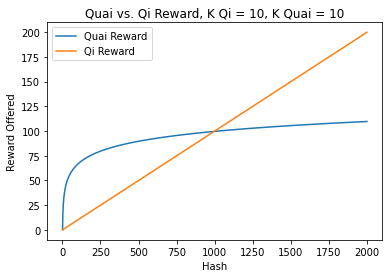

In [2]:
import numpy as np
import matplotlib.pyplot as plt

state["K Qi"] = 10
state["K Quai"] = 10

hash = np.arange(1, 2000)
quai = [msi.metrics['Hash to Quai Metric'](state, params, [{"Hash": x}]) for x in hash]
qi = [msi.metrics['Hash to Qi Metric'](state, params, [{"Hash": x}]) for x in hash]

plt.plot(hash, quai)
plt.plot(hash, qi)
plt.legend(["Quai Reward", "Qi Reward"])
plt.title("Quai vs. Qi Reward, K Qi = {}, K Quai = {}".format(state["K Qi"],
                                                              state["K Quai"]))
plt.xlabel("Hash")
plt.ylabel("Reward Offered")
plt.show()

In [3]:
from math import log
2 ** (log(100, 2))

100.00000000000004

In [4]:
a = msi.metrics['Hash to Quai Metric'](state, params, [{"Hash": 100}])
b = msi.metrics['Hash to Qi Metric'](state, params, [{"Hash": 100}])


print(a, b)

66.43856189774725 10.0


In [5]:
a = msi.metrics['Quai to Hash Metric'](state, params, [{"Quai": a}])
b = msi.metrics['Qi to Hash Metric'](state, params, [{"Qi": b}])

print(a, b)

100.00000000000004 100.0
